In [1]:
import numpy as np
from scipy import optimize
from scipy import signal

import pandas as pd
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import plotly
pd.options.plotting.backend = "matplotlib"

In [4]:
behaviour = pd.read_hdf('/Users/Oliver/Google Drive/Imaging_Results/171_172_173_174/behaviour.h5', 'behaviour')
behaviour

,Time,Lap,Position,Velocity,Pump,Licking,Opto,index_facecam,PupilDiam,PupilX,...,GaitCorr_front,GaitCorr_back,GaitCorr_right,PawDistF_LR_raw,PawDistF_LR,PawDistB_LR_raw,PawDistR_FB_raw,PawDistR_FB,Stride_Frequency_F,Stride_Frequency_B
0,0.007,1,341.113973,2.320778,False,0.000000,NaN,0,0.036516,540.062744,...,NaN,NaN,NaN,NaN,NaN,NaN,400.733074,0.335559,NaN,NaN
1,0.020,1,341.275614,2.333890,False,0.000000,NaN,1,0.036580,540.406006,...,NaN,NaN,NaN,NaN,NaN,NaN,394.114029,0.266910,NaN,NaN
2,0.034,1,341.441255,2.346680,False,0.000000,NaN,2,0.036777,540.054688,...,NaN,NaN,NaN,NaN,NaN,NaN,389.761519,0.221767,NaN,NaN
3,0.047,1,341.614394,2.354594,False,0.000000,NaN,3,0.037122,539.963257,...,NaN,NaN,NaN,NaN,NaN,NaN,385.548786,0.178075,NaN,NaN
4,0.060,1,341.788867,2.356609,False,0.000000,NaN,4,0.037630,540.060974,...,NaN,NaN,NaN,NaN,NaN,NaN,384.559182,0.167811,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222933,2964.994,119,87.376580,NaN,False,0.000600,NaN,222933,0.758513,537.712952,...,0.085911,NaN,-0.359697,36.547243,NaN,NaN,430.261798,0.641816,NaN,NaN
222934,2965.007,119,87.376580,NaN,False,0.000685,NaN,222934,0.755649,537.662292,...,0.127485,NaN,-0.376796,36.080953,NaN,NaN,430.038036,0.639496,NaN,NaN
222935,2965.021,119,87.376580,NaN,False,0.000673,NaN,222935,0.753591,537.590088,...,NaN,NaN,-0.392048,NaN,NaN,NaN,429.966738,0.638756,NaN,NaN
222936,2965.034,119,87.376580,NaN,False,0.000705,NaN,222936,0.752349,537.764282,...,NaN,NaN,-0.400418,NaN,NaN,NaN,429.714794,0.636143,NaN,NaN


# STRIDE FREQUENCY based on right front paw

In [3]:
dlc_body = pd.read_hdf('/Users/Oliver/Google Drive/Imaging_Results/171_172_173_174/DLC_body/Basler acA780-75gm (22611479)_20190220_105921714DeepCut_resnet50_MouseBodySep9shuffle1_800000.h5')
dlc_body.columns = pd.MultiIndex.from_arrays([dlc_body.columns.get_level_values(1), dlc_body.columns.get_level_values(2)], names=dlc_body.columns.names[1:])

In [4]:
dlc_body2 = dlc_body.copy()
dlc_body2.columns = ['_'.join(col) for col in dlc_body2.columns.values]
dlc_body2['Time'] = dlc_body2.index / 75
dlc_body2

,nose_x,nose_y,nose_likelihood,mouth_x,mouth_y,mouth_likelihood,eartip_x,eartip_y,eartip_likelihood,paw_front-right1_x,...,tail2_x,tail2_y,tail2_likelihood,tail3_x,tail3_y,tail3_likelihood,back_x,back_y,back_likelihood,Time
0,785.043685,275.877191,0.999992,736.705278,303.802008,1.000000,591.434356,164.820842,1.000000,649.710865,...,88.621763,306.093217,0.196505,4.731048,328.214540,0.982473,324.158410,197.505363,1.000000,0.000000
1,783.610781,275.553900,0.999995,736.962111,304.230929,1.000000,590.343077,165.252114,1.000000,624.684362,...,78.786101,310.081293,0.202108,4.165689,331.048740,0.962445,329.477632,197.855263,0.998047,0.013333
2,785.721855,276.301306,0.999986,739.012883,305.713470,1.000000,588.395435,165.008635,1.000000,589.746255,...,81.908603,312.740685,0.916875,5.533281,334.880906,0.977090,318.767757,199.678898,0.997883,0.026667
3,785.463896,275.778755,0.999995,739.670451,304.028534,1.000000,587.481886,165.391730,0.999999,571.662170,...,86.678313,311.593539,0.998108,4.925364,335.201398,0.980950,328.021889,198.746494,0.999840,0.040000
4,785.860881,274.893428,0.999985,737.580865,305.477513,1.000000,584.916432,166.709089,0.999996,559.205241,...,85.160134,313.141424,0.996144,4.616055,337.259486,0.963376,314.559474,199.151323,0.999703,0.053333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222933,785.079649,273.722336,0.999990,734.815753,302.961877,0.999999,606.007392,161.629661,1.000000,684.419880,...,76.455198,343.353976,0.851597,281.396401,240.946761,0.445597,328.728368,236.020015,0.266991,2972.440000
222934,785.115930,273.657664,0.999990,735.402979,302.567832,0.999999,606.026735,161.513856,1.000000,684.350502,...,76.601342,343.345616,0.880246,281.875856,241.377417,0.299675,434.912404,196.358320,0.208584,2972.453333
222935,785.027111,273.653157,0.999991,735.149575,302.698557,0.999999,606.022845,161.522748,1.000000,684.396074,...,76.922473,343.499532,0.926767,281.402351,241.963316,0.276883,329.213102,235.629913,0.196265,2972.466667
222936,785.103112,273.116086,0.999990,735.917262,302.858455,1.000000,605.929307,161.541704,1.000000,684.762986,...,77.522654,342.833889,0.891182,281.018919,242.754568,0.340206,434.997541,196.852808,0.186133,2972.480000


In [5]:
dlc_bodyc = dlc_body.copy()
for col in dlc_bodyc.columns.get_level_values(0).unique():
    dlc_bodyc.loc[dlc_bodyc[col, 'likelihood']<.9999, col] = np.nan
    dlc_bodyc[col, 'time'] = dlc_bodyc.index/75
dlc_bodyci = dlc_bodyc.interpolate(method='linear')
dlc_bodyz = (dlc_bodyci - dlc_bodyci.min()) / (dlc_bodyci - dlc_bodyci.min()).max()


In [6]:
pawfr = dlc_body['paw_front-right2', 'x']
pawconf = dlc_body['paw_front-right2', 'likelihood']
pawfr = pawfr * (pawconf>.99)
pawfr[pawfr==0] = np.nan
pawfri = pawfr.interpolate(method='polynomial', order=3)
pawfr = (pawfr - pawfr.min()) / (pawfr - pawfr.min()).max()
pawfr = pawfr.interpolate(method='polynomial', order=3)

pawfry = dlc_body['paw_front-right2', 'y']
pawconf = dlc_body['paw_front-right2', 'likelihood']
pawfry = pawfry * (pawconf>.9999)
pawfry[pawfry==0] = np.nan
pawfry = pawfry.interpolate(method='polynomial', order=3)
pawfryz = (pawfry - pawfry.quantile(.05)) / (pawfry - pawfry.quantile(.05)).quantile(.95)

pawfl = dlc_body['paw_front-left', 'x']
pawconf = dlc_body['paw_front-left', 'likelihood']
pawfl = pawfl * (pawconf>.9999)
pawfl[pawfl==0] = np.nan
pawfl = (pawfl - pawfl.quantile(.05)) / (pawfl - pawfl.quantile(.05)).quantile(.95)
pawfl = pawfl.interpolate(method='polynomial', order=2)

pawbr = dlc_body['paw_back-right2', 'x']
pawconf = dlc_body['paw_back-right2', 'likelihood']
pawbr = pawbr * (pawconf>.99)
pawbr[pawbr==0] = np.nan
pawbri = pawbr.interpolate(method='polynomial', order=3)
pawbr = (pawbr - pawbr.min()) / (pawbr - pawbr.min()).max()
pawbr = pawbr.interpolate(method='polynomial', order=3)

pawbry = dlc_body['paw_back-right2', 'y']
pawconf = dlc_body['paw_back-right2', 'likelihood']
pawbry = pawbry * (pawconf>.9999)
pawbry[pawbry==0] = np.nan
pawbry = pawbry.interpolate(method='polynomial', order=3)
pawbryz = (pawbry - pawbry.quantile(.05)) / (pawbry - pawbry.quantile(.05)).quantile(.95)

pawbl = dlc_body['paw_back-left', 'x']
pawconf = dlc_body['paw_back-left', 'likelihood']
pawbl = pawbl * (pawconf>.9999)
pawbl[pawbl==0] = np.nan
pawbl = (pawbl - pawbl.quantile(.05)) / (pawbl - pawbl.quantile(.05)).quantile(.95)
pawbl = pawbl.interpolate(method='polynomial', order=2)

(0.0, 782.0)

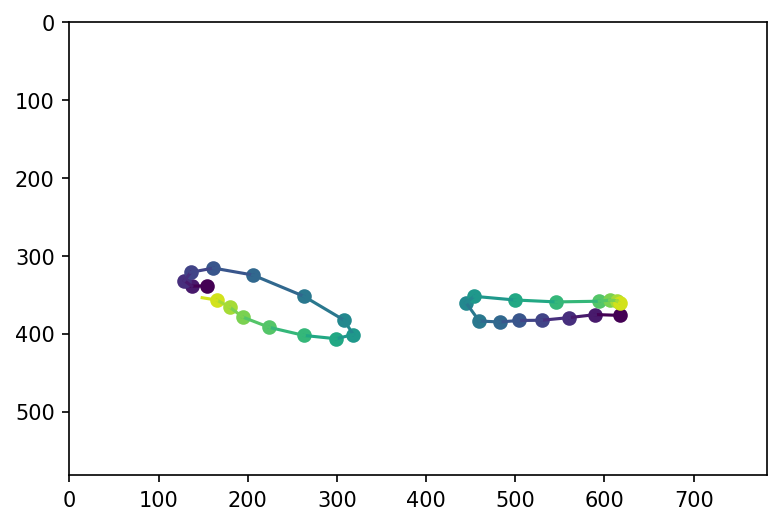

In [9]:
import seaborn as sns
from matplotlib import cm

#2605:2630
#2637:2690
for i in range(2660, 2675):
    plt.scatter(pawfri.iloc[i], pawfry.iloc[i], color=cm.viridis(round((i-2660)*17)))
    plt.plot(pawfri.iloc[i:i+2], pawfry.iloc[i:i+2], color=cm.viridis(round((i-2660)*17)))
    plt.scatter(pawbri.iloc[i], pawbry.iloc[i], color=cm.viridis(round((i-2660)*17)))
    plt.plot(pawbri.iloc[i:i+2], pawbry.iloc[i:i+2], color=cm.viridis(round((i-2660)*17)))
plt.ylim(582, 0)
plt.xlim(0, 782)
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/right_pawsxy_171_2650-2700.pdf', dpi=300)


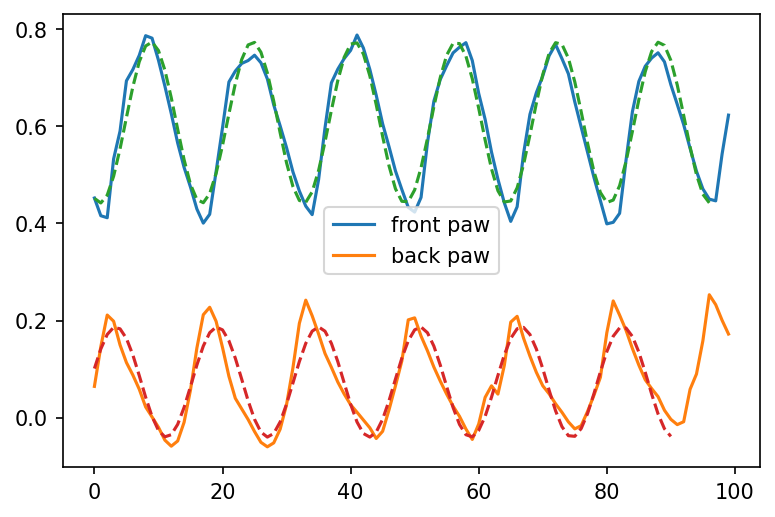

In [12]:
plt.plot(pawfr.iloc[2650:2750].values, label='front paw')
plt.plot(pawbr.iloc[2650:2750].values-.25, label='back paw')
plt.legend()
resfr = fit_sin(pawfr.iloc[2650:2750].values)
plt.plot(np.roll(resfr["fitfunc"](range(2650, 2750)), -3)[:-3], ls='--')
resbr = fit_sin(pawbr.iloc[2650:2750].values)
plt.plot(np.roll(resbr["fitfunc"](range(2650, 2750))-.25, -9)[:-9], ls='--')
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/right_pawsxysine_171_2650-2750.pdf', dpi=300)

In [11]:
# written by unsym: https://stackoverflow.com/a/42322656

def fit_sin(yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(range(len(yy)))
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    try:
        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        f = w/(2.*np.pi)
        fitfunc = lambda t: A * np.sin(w*t + p) + c
        return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}
    except:
        return np.nan
    
def fit_sin_A(yy):  # amplitude
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(range(len(yy)))
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    try:
        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        return A
    except:
        return np.nan

def fit_sin_w(yy):  # omega
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(range(len(yy)))
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    try:
        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        return w
    except:
        return np.nan

def fit_sin_p(yy):  # phase
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(range(len(yy)))
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    try:
        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        return p
    except:
        return np.nan

def fit_sin_c(yy):  # offset
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(range(len(yy)))
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    try:
        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        return c
    except:
        return np.nan
    
def fit_sin_error(yy):  # mean SD error
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(range(len(yy)))
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])
    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    try:
        popt, pcov = optimize.curve_fit(sinfunc, tt, yy, p0=guess)
        A, w, p, c = popt
        return np.mean(np.sqrt(np.diag(pcov)))
    except:
        return np.nan

In [13]:
paws = pawfr#.iloc[:10000]

In [14]:
#A = paws.rolling(75, center=True, min_periods=50).apply(fit_sin_A)
w = paws.rolling(75, center=True, min_periods=50).apply(fit_sin_w)
#p = paws.rolling(75, center=True, min_periods=50).apply(fit_sin_p)
#c = paws.rolling(75, center=True, min_periods=50).apply(fit_sin_c)
error = paws.rolling(75, center=True, min_periods=50).apply(fit_sin_error)

/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [15]:
w_clean = w.copy()
w_clean[w_clean.diff().abs()>.01] = np.nan
w_clean[error>.05] = np.nan
w_clean[w_clean<0] = np.nan
w_clean = w_clean.interpolate(method='polynomial', order=3, limit=150)
w_smooth = w_clean.rolling(25, center=True, min_periods=15).mean(window='gaussian')
f_smooth = w_smooth/(2.*np.pi)*75

# A_clean = A.copy().abs()
# A_clean[A_clean.diff().abs()>.01] = np.nan
# A_clean[error>.1] = np.nan
# # A_clean = A_clean.interpolate(method='polynomial', order=3)
# A_smooth = A_clean.rolling(25, center=True, min_periods=5).mean(window='gaussian')

width = paws.rolling(25, center=True, min_periods=15).max() - paws.rolling(25, center=True, min_periods=15).min()

(0.0, 5.0)

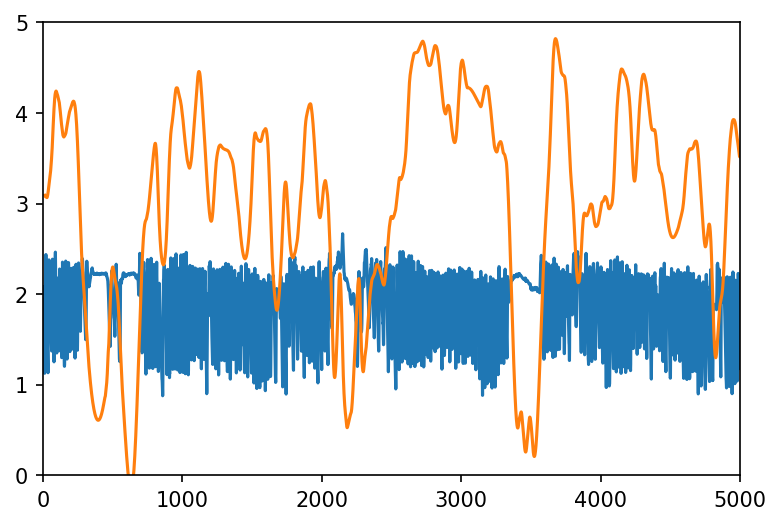

In [16]:
(paws*3).plot()
f_smooth.plot()
#error.plot()
#width.plot()
#p.plot()
plt.xlim(0,5000)
plt.ylim(0,5)
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/right_pawstride_171.pdf', dpi=300)

In [17]:
behaviour['FR-BR_Paw_correlation'] = pawfr.rolling(75, center=True, min_periods=50).corr(pawbr)

In [18]:
behaviour['Stride_freq'] = f_smooth

In [25]:
velo_cal = (behaviour.Lap.max()*360 / behaviour.Time.max()) / behaviour.Velocity.mean()
behaviour.Velocity = behaviour.Velocity*velo_cal
behaviour['VeloBin'], velo_labels = pd.cut(behaviour.Velocity, 50, labels=False, retbins=True)
velo_labels

array([-9.12081861, -7.9164778 , -6.76948655, -5.6224953 , -4.47550405,
       -3.3285128 , -2.18152156, -1.03453031,  0.11246094,  1.25945219,
        2.40644343,  3.55343468,  4.70042593,  5.84741718,  6.99440842,
        8.14139967,  9.28839092, 10.43538217, 11.58237341, 12.72936466,
       13.87635591, 15.02334716, 16.1703384 , 17.31732965, 18.4643209 ,
       19.61131215, 20.7583034 , 21.90529464, 23.05228589, 24.19927714,
       25.34626839, 26.49325963, 27.64025088, 28.78724213, 29.93423338,
       31.08122462, 32.22821587, 33.37520712, 34.52219837, 35.66918961,
       36.81618086, 37.96317211, 39.11016336, 40.2571546 , 41.40414585,
       42.5511371 , 43.69812835, 44.8451196 , 45.99211084, 47.13910209,
       48.28609334])

<AxesSubplot:xlabel='VeloBin', ylabel='FR-BR_Paw_correlation'>

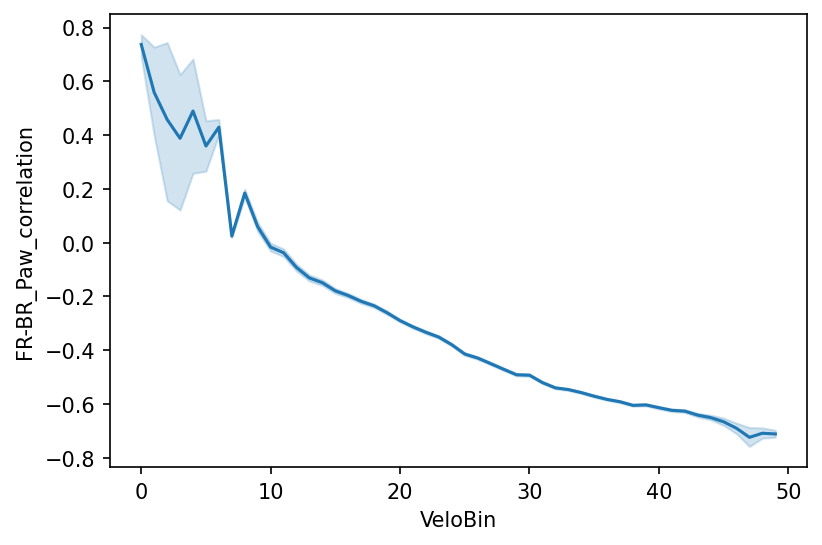

In [20]:
fig, ax = plt.subplots()
sns.lineplot(data=behaviour, x='VeloBin', y='FR-BR_Paw_correlation', ax=ax)
#ax.set_xticks(50/(max(velo_labels)))
#ax.set_xticklabels(velo_labels, rotation='vertical', fontsize=18)
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/pawcorr_velocity_171.pdf', dpi=300)

# Check Whisking frequencies

In [21]:
of_test = pd.read_hdf('/Users/Oliver/Google Drive/Imaging_Results/171_172_173_174/of_test.h5', key='of_test')

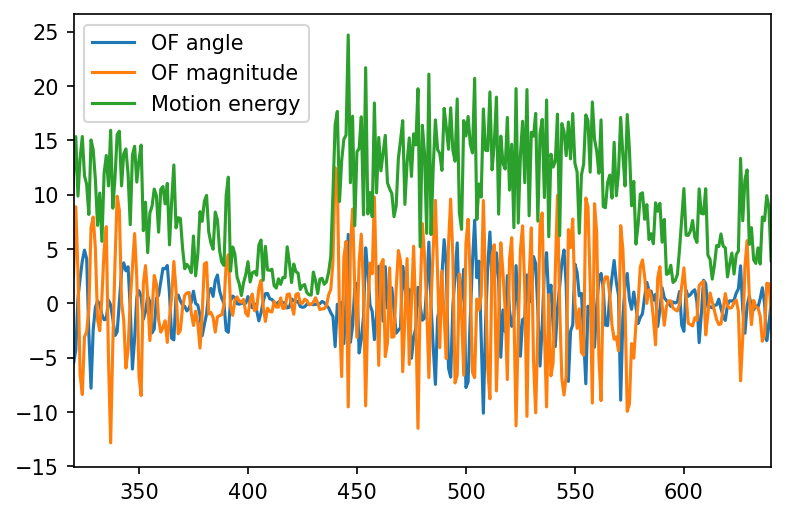

In [22]:
of_test.ofang_whisker.plot(xlim=(320, 640), label='OF angle')
of_test.ofmag_whisker.plot(xlim=(320, 640), label='OF magnitude')
of_test.me_whisker.plot(xlim=(320, 640), label='Motion energy')
plt.legend()
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisking_171.pdf', dpi=300)

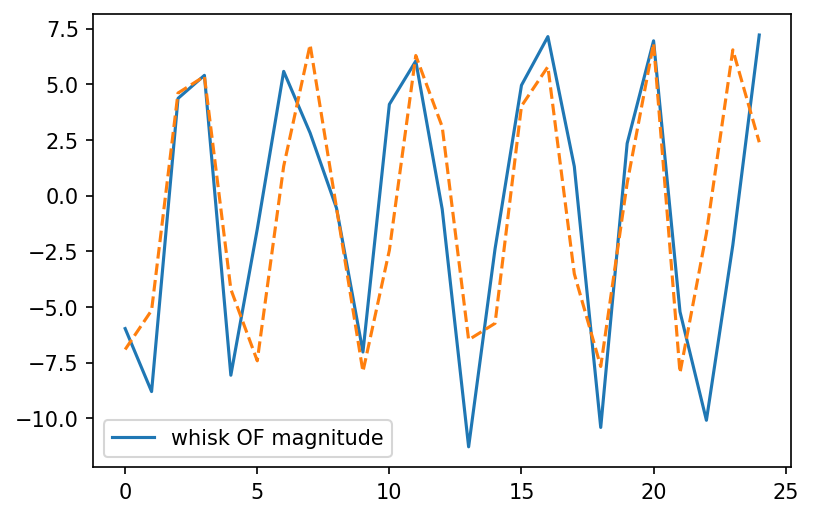

In [23]:
plt.plot(of_test.ofmag_whisker.iloc[510:535].values, label='whisk OF magnitude')
plt.legend()
resfr = fit_sin(of_test.ofmag_whisker.iloc[510:535].values)
plt.plot(np.roll(resfr["fitfunc"](range(510, 535)), -4)[:], ls='--')
#resbr = fit_sin(pawbr.iloc[2650:2750].values)
#plt.plot(np.roll(resbr["fitfunc"](range(2650, 2750))-.25, -9)[:-9], ls='--')
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisk_sine_171_510-535.pdf', dpi=300)

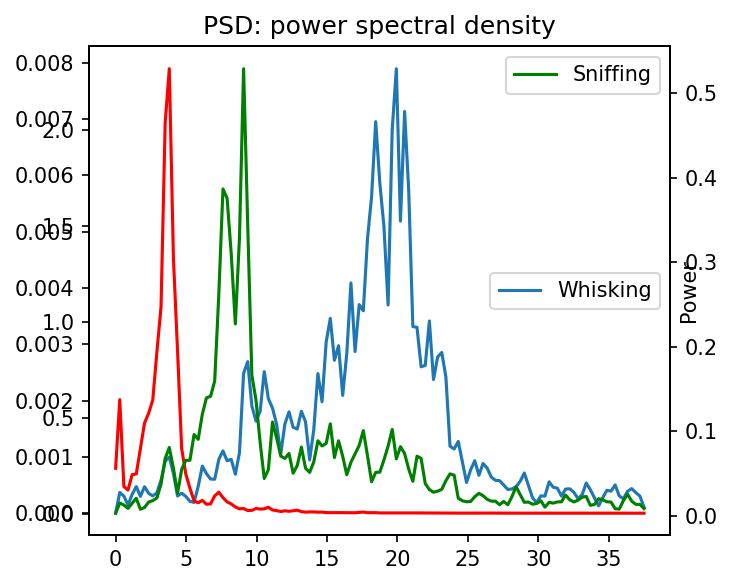

In [24]:
freqs, psd = signal.welch(of_test.ofmag_whisker, fs=75)

plt.figure(figsize=(5, 4))
plt.plot(freqs, psd, label='Whisking')
plt.legend(loc=7)

ax2=plt.twinx()
plt.title('PSD: power spectral density')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.tight_layout()

freqs, psd = signal.welch(pawfr.iloc[:1700], fs=75)
#plt.semilogx(freqs, psd)
ax2.plot(freqs, psd, c='red', label='Paw strides')

ax3=plt.twinx()
freqs, psd = signal.welch(of_test.ofmag_nose, fs=75)
ax3.plot(freqs, psd, c='green', label='Sniffing')
plt.legend()

#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/paw_whisk_sniff_spectrum_171.pdf', dpi=300)

In [25]:
whisk_freq = of_test.ofmag_whisker.rolling(25, center=True, min_periods=15).apply(fit_sin_w)/(2.*np.pi)*75
error = of_test.ofmag_whisker.rolling(25, center=True, min_periods=15).apply(fit_sin_error)

In [26]:
whisk_clean = whisk_freq.copy()
whisk_clean[whisk_clean.diff().abs()>2] = np.nan
whisk_clean[error>1] = np.nan
whisk_clean = whisk_clean.interpolate(method='polynomial', order=3, limit=50)
whisk_smooth = whisk_clean.rolling(25, center=True, min_periods=15).mean(window='gaussian')

(0.0, 750.0)

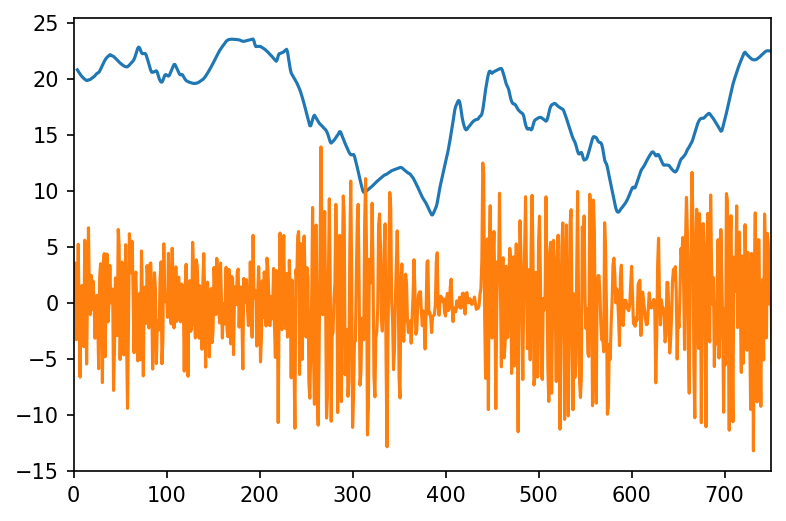

In [27]:
whisk_smooth.plot()
#(error*10).plot()
of_test.ofmag_whisker.plot()
#behaviour['Stride_freq'].plot()
plt.xlim(0, 750)
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisk_freq_171.pdf', dpi=300)

# Combination of whisking/running strides

In [28]:
behaviour.loc[whisk_smooth.index, 'Whisking_freq'] = whisk_smooth

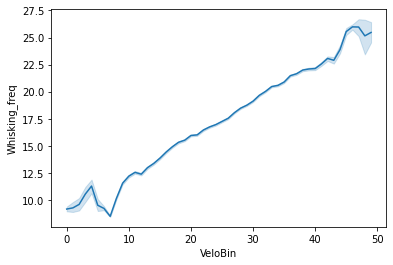

In [28]:
import seaborn as sns
sns.lineplot(data=behaviour, x='VeloBin', y='Whisking_freq')
plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whiskfreq_velo_171.pdf', dpi=300)

In [29]:
import pingouin as pg
pg.corr(behaviour.Velocity, behaviour.Whisking_freq)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,222908,0.728793,"[0.73, 0.73]",0.531139,0.531135,0.0,inf,1.0


/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.4.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


Text(0.5, 0, 'Frequency [Hz]')

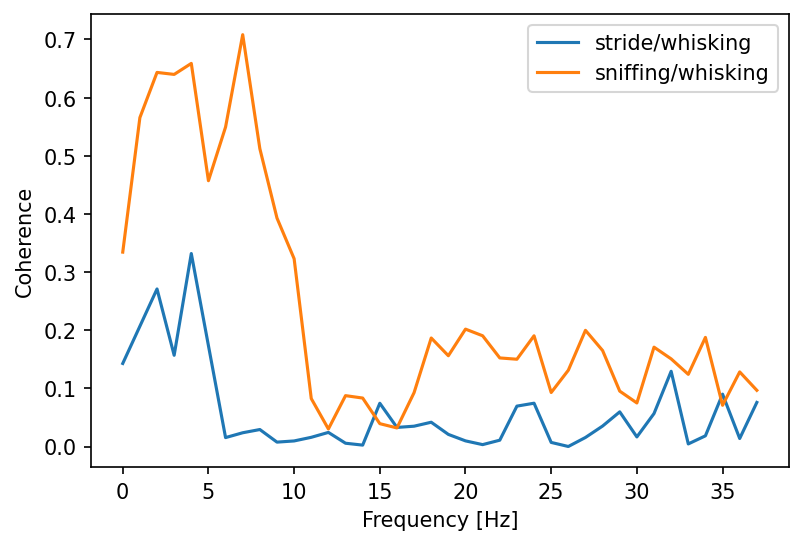

In [30]:
f, Cxy = signal.coherence(pawfr.iloc[:1700].values, of_test.ofmag_whisker, fs=75, nperseg=75)
plt.plot(f, Cxy, label='stride/whisking')
f, Cxy = signal.coherence(of_test.ofmag_nose, of_test.ofmag_whisker, fs=75, nperseg=75)
plt.plot(f, Cxy, label='sniffing/whisking')
plt.legend()
plt.ylabel('Coherence')
plt.xlabel('Frequency [Hz]')
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisk_stride_coherence_171.pdf', dpi=300)

In [31]:
behaviour.loc[:1830, 'Whisk_Power4Hz'] = of_test.ofmag_whisker.rolling(75).apply(lambda x: np.mean(signal.welch(x, fs=75)[1][2:8]))

/Users/Oliver/anaconda3/envs/hippnac/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 75, using nperseg = 75
  warnings.warn('nperseg = {0:d} is greater than input length '


<AxesSubplot:xlabel='VeloBin', ylabel='Whisk_Power4Hz'>

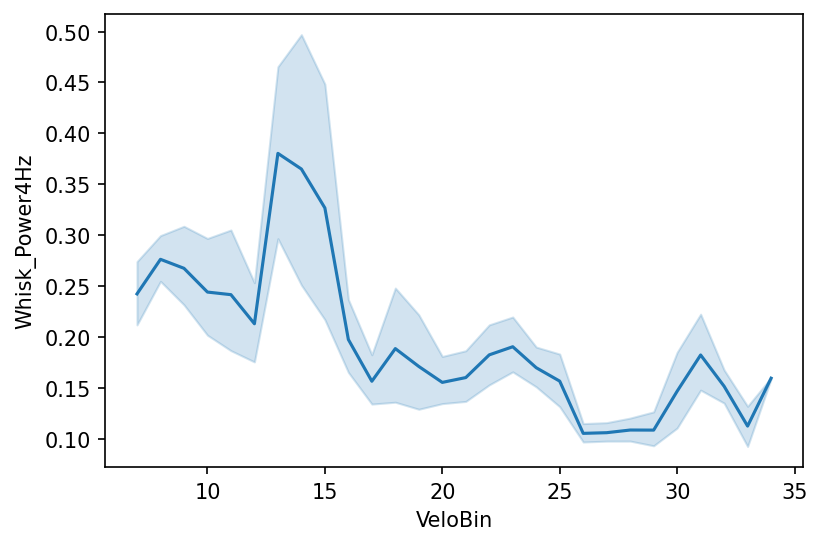

In [32]:
sns.lineplot(data=behaviour, x='VeloBin', y='Whisk_Power4Hz')


# Sniffing

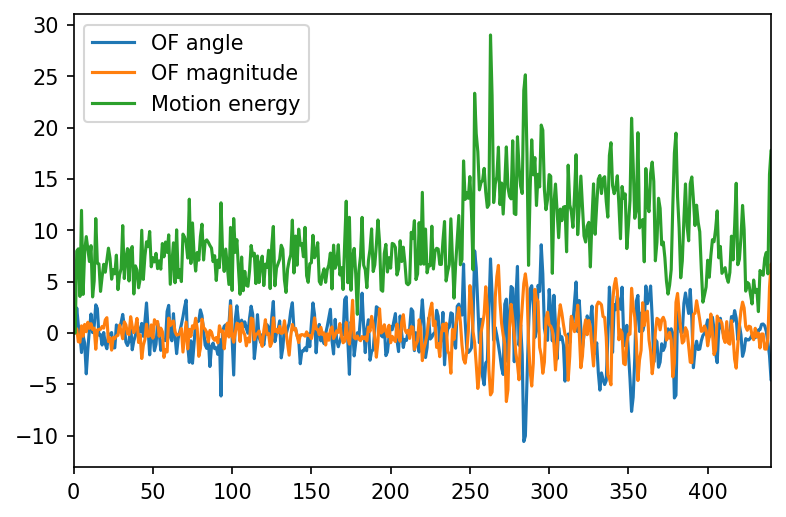

In [33]:
of_test.ofang_nose.plot(xlim=(0, 440), label='OF angle')
of_test.ofmag_nose.plot(xlim=(0, 440), label='OF magnitude')
of_test.me_nose.plot(xlim=(0, 440), label='Motion energy')
plt.legend()
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisking_171.pdf', dpi=300)

In [34]:
sniff_freq = of_test.ofmag_nose.rolling(25, center=True, min_periods=15).apply(fit_sin_w)/(2.*np.pi)*75
sniff_amp = of_test.ofmag_nose.rolling(25, center=True, min_periods=15).apply(fit_sin_A).abs()
error = of_test.ofmag_nose.rolling(25, center=True, min_periods=15).apply(fit_sin_error)

In [72]:
sniff_clean = sniff_amp.copy()
sniff_clean[sniff_clean.diff().abs()>2] = np.nan
sniff_clean[error>1] = np.nan
sniff_clean = sniff_clean.interpolate(method='polynomial', order=3, limit=50)
sniff_smooth = sniff_clean.rolling(25, center=True, min_periods=15).mean(window='gaussian')


(0.0, 1000.0)

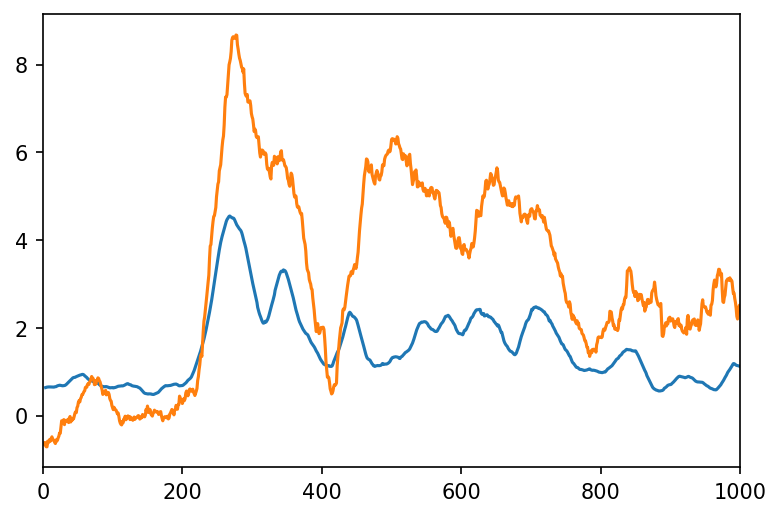

In [73]:
#sniff_amp.plot()
sniff_smooth.plot()
(of_test.me_nose.rolling(50, center=True, min_periods=15).mean(window='gaussian')-7).plot()
#behaviour['Stride_freq'].plot()
plt.xlim(0, 1000)
#plt.ylim(-15, 15)
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisk_freq_171.pdf', dpi=300)

<AxesSubplot:xlabel='VeloBin', ylabel='Sniffing_freq'>

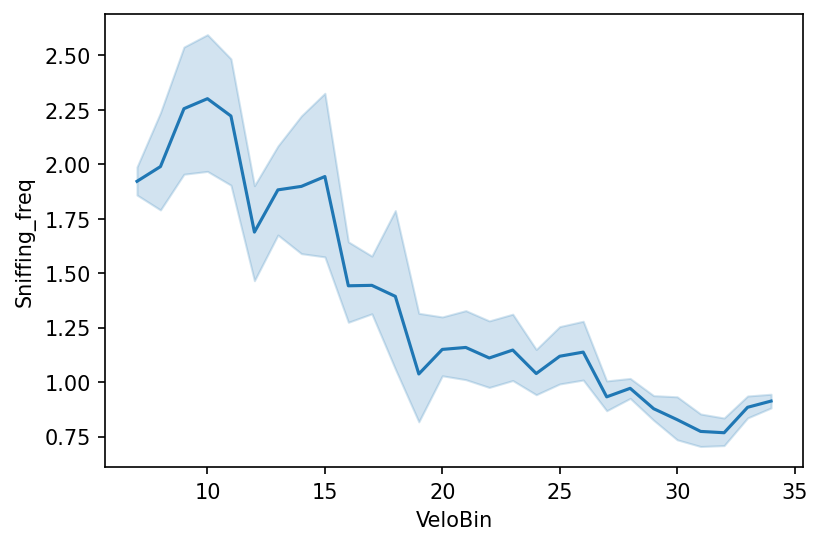

In [68]:
behaviour.loc[sniff_smooth.index, 'Sniffing_freq'] = sniff_smooth
sns.lineplot(data=behaviour, x='VeloBin', y='Sniffing_freq')


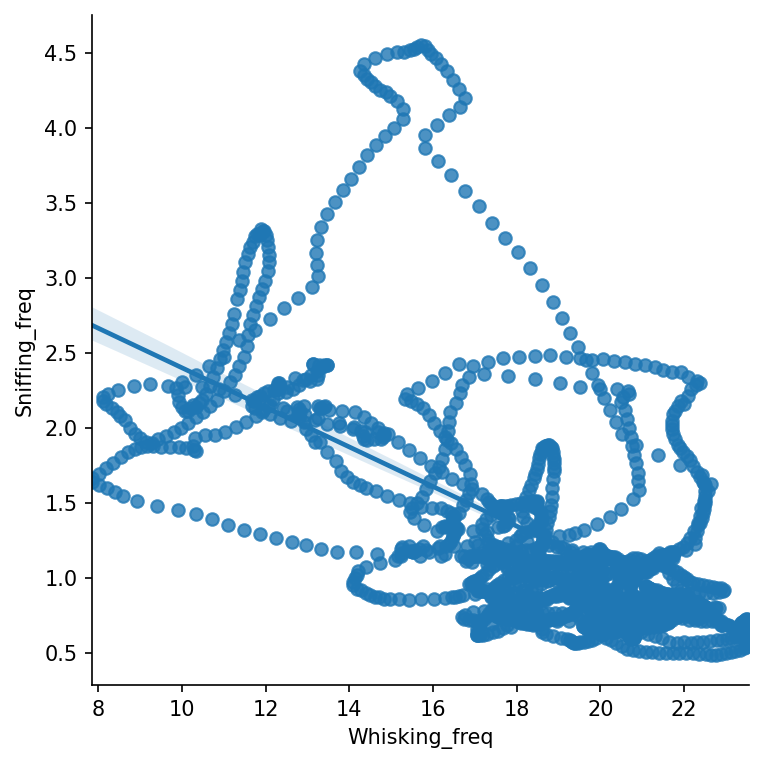

In [69]:
sns.lmplot(data=behaviour, x='Whisking_freq', y='Sniffing_freq')

# Chewing

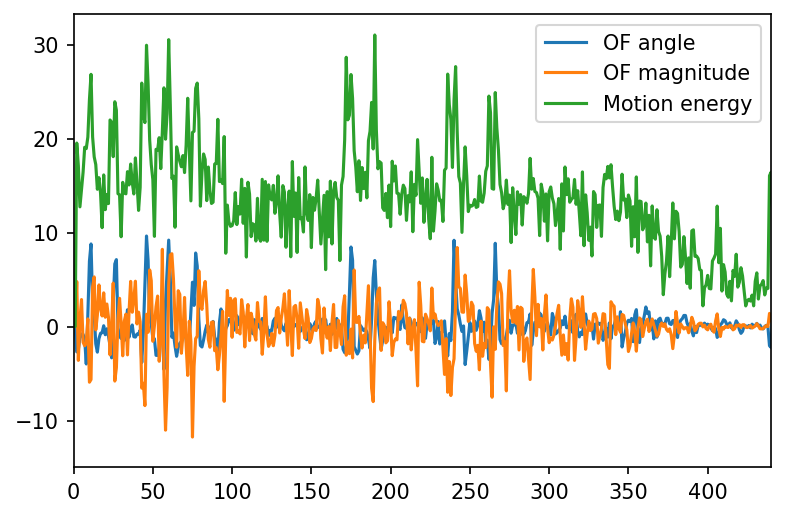

In [38]:
of_test.ofang_mouth.plot(xlim=(0, 440), label='OF angle')
of_test.ofmag_mouth.plot(xlim=(0, 440), label='OF magnitude')
of_test.me_mouth.plot(xlim=(0, 440), label='Motion energy')
plt.legend()
#plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/whisking_171.pdf', dpi=300)

In [60]:
#sos = signal.butter(40, 10, 'lp', fs=75, output='sos')
#filtered = pd.Series(signal.sosfilt(sos, of_test.ofang_mouth)).shift(-30)
#(-of_test.ofmag_mouth).plot(xlim=(0,300))
from scipy.signal import hilbert, butter, filtfilt
mouth_env = np.abs(hilbert(of_test.ofang_mouth))
# Low-Pass Butter filter:
fc = 10  # Cut-off frequency of the filter
w = fc / (75 / 2) # Normalize the frequency to SamplingFrequency
b, a = butter(5, w, 'low')
mouth_envfilt = pd.Series(filtfilt(b, a, mouth_env)).shift(12)
#plt.plot(mouth_env)
#plt.plot(mouth_envfilt)
#plt.xlim(0, 500)
#plt.plot(filtered)

import plotly.express as px

from scipy.signal import find_peaks
licks = find_peaks(mouth_envfilt, prominence=1.5)[0]

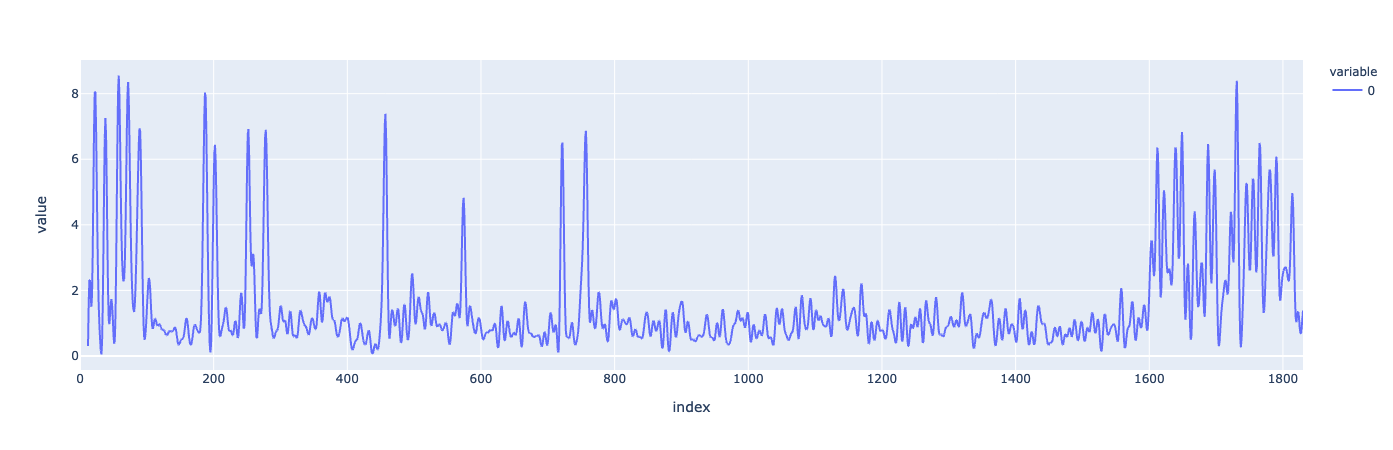

In [63]:
behaviour['Licks_cam'] = False
behaviour.loc[licks, 'Licks_cam'] = True
px.line(mouth_envfilt)


In [62]:
licks

array([  23,   38,   58,   72,   89,  103,  187,  202,  252,  278,  457,
        497,  574,  722,  757, 1130, 1169, 1320, 1406, 1558, 1612, 1622,
       1639, 1649, 1658, 1668, 1688, 1698, 1722, 1731, 1746, 1755, 1765,
       1780, 1790, 1814])

In [5]:
behaviour.columns

Index(['Time', 'Lap', 'Position', 'Velocity', 'Pump', 'Licking', 'Opto',
       'index_facecam', 'PupilDiam', 'PupilX', 'PupilY', 'EyeLidDist',
       'EyeBlinks', 'MotionEnergy_Nose', 'MotionEnergy_Whiskerpad',
       'MotionEnergy_Mouth', 'MotionEnergy_Cheek', 'OFmag_Nose',
       'OFmag_Whiskerpad', 'OFmag_Mouth', 'OFmag_Cheek', 'OFang_Nose',
       'OFang_Whiskerpad', 'OFang_Mouth', 'OFang_Cheek', 'Whisking_freq',
       'Sniff_freq', 'Chewing_Envelope', 'Chew', 'index_bodycam',
       'PointMotion_FrontPaw', 'AngleMotion_FrontPaw', 'PointMotion_Mouth',
       'AngleMotion_Mouth', 'PointMotion_BackPaw', 'AngleMotion_BackPaw',
       'Angle_Tail_3', 'Angle_Tail', 'Angle_Paws_Front_3', 'Angle_Paws_Front',
       'Angle_Paws_Back', 'Angle_Paws_Back_3', 'Tailroot_Level',
       'Cylinder_Motion', 'Stride_Frequency', 'Gait_x', 'Gait_eq',
       'GaitCorr_front', 'GaitCorr_back', 'GaitCorr_right', 'PawDistF_LR_raw',
       'PawDistF_LR', 'PawDistB_LR_raw', 'PawDistR_FB_raw', 'PawDistR_FB

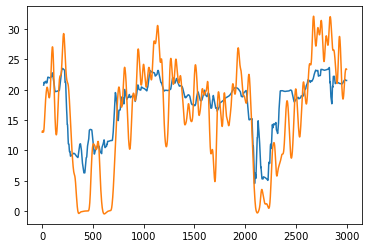

In [27]:
#behaviour.OFang_Whiskerpad.iloc[500:600].plot()
#behaviour.OFmag_Whiskerpad.iloc[500:600].plot()
behaviour.Whisking_freq.iloc[:3000].plot()
behaviour.Velocity.iloc[:3000].plot()
plt.savefig('/Users/Oliver/Google Drive/Imaging_Results/Figures/1/171_Whisk_Velo.pdf', dpi=300)